# Text Analysis of David Eargle's Class
## Mission: To analyze the overall tone of the class transcript based on Bing Liu's sentiment analysis
### Result? Dave's class is pretty depressing

Install packages. pdftools and tidytext will be used throughout. In order to do this I had to change the directory they were installed into for Jupyter to recognize them.

In [5]:
install.packages("pdftools", lib='/Library/Frameworks/R.framework/Versions/4.0/Resources/library')
install.packages("tidytext", lib='/Library/Frameworks/R.framework/Versions/4.0/Resources/library')
install.packages("wordcloud", lib='/Library/Frameworks/R.framework/Versions/4.0/Resources/library')

also installing the dependencies ‘SnowballC’, ‘hunspell’, ‘tokenizers’, ‘janeaustenr’





The downloaded binary packages are in
	/var/folders/jg/4wgsfh7s3mxgdftf_wx5vqd00000gn/T//Rtmp7HMHEI/downloaded_packages

The downloaded binary packages are in
	/var/folders/jg/4wgsfh7s3mxgdftf_wx5vqd00000gn/T//Rtmp7HMHEI/downloaded_packages


Use the libraries!

In [1]:
library(pdftools)
library(tidytext)
library(dplyr)
library(stringr)
library(tidyr)
library(ggplot2)
library(reshape2)
library(wordcloud)

Using poppler version 0.73.0


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths


Loading required package: RColorBrewer



In [27]:
d <- pdf_text("~/Desktop/deargle_full_ts.pdf")


Remove line breaks and replace them with spaces.
Remove apostrophes. 

In [34]:
d <- str_replace_all(d, "\r\n", " ")
d <- str_replace_all(d, "\n", " ")
d <- str_replace_all(d, "\'", "")

Each page is its own vector, so one could access each page by indexing it. Examples below.

In [39]:
d[1]

[1] "David Eargle: My just totally spacing out David Eargle: Some of you. I dont have David Eargle: On the David Eargle: Slack. David Eargle: Channel for David Eargle: The grad program for the analytics thing if you give us out. David Eargle: Thanks. Can you guys turn on video. I know. Ty I know youre calling in. David Eargle: Cheese him dont David Eargle: Tell You surprise me Tyler is getting his laptop fixed because hes too chicken to take it apart to replace his own screen keyboard. Ty Tinker: Its pretty scary. David Eargle: Is that where you are right now. Ty Tinker: Now Im in my office, but my phone doesnt hold charge. Very good. So Im standing right next to the to the outlet and listening in. Ty Tinker: Whatever it takes. Im paying for it. David Eargle: laptops are not fun to take apart because theyre so compact that David Eargle: You cant fix one thing without taking apart. Everything unless they David Eargle: Explicitly make it possible like memory or disk. Sometimes you can pop out. David Eargle: See Sam Did you just switch into this track. David Eargle: Can you hear David Eargle: Me no David Eargle: Catch up with Sam later. David Eargle: Last year, Sam, can you hear me. "

In [47]:
d[317]

[1] "David Eargle: What about just crypt. David Eargle: data at rest is protected. This is SC 12 data in transit is protected. David Eargle: protections against data leaks. David Eargle: Heres integrity protection. David Eargle: Oh, Im going to show you guys this David Eargle: I can show you the slide deck coming up. David Eargle: An exercise in incident response to open that up in your browsers David Eargle: Were going to do, Im going to, were going to read together like storytime. The beginning of this and then were going to get to a point. David Eargle: And Im gonna stop and ask you David Eargle: What would you do if you were in charge. David Eargle: Of information security. If youre this guy, what would you think to do at this point. This is kind of like an exercise in David Eargle: Thinking about okay your child has stopped breathing. What do you do, it is better to think about this when your child hasnt actually stopped breathing, because then youll be in a panic or your house is on fire. Where do you gather and congregate. David Eargle: Thats what were going to do a scenario based. The house is on fire. David Eargle: 2018 cyber limbic attacks. David Eargle: And, you know, sitting on a plastic chair. If you doesnt rose up on the floor Pyong Chang vast pen to Donal Olympic Stadium, something about his outfit skipping that David Eargle: He was in charge of it and everything, though. David Eargle: That admins collection of machines seem to be functioning functioning perfectly almost half an hour earlier gotten word about a nagging technical issue. David Eargle: The source of that problem was a contract or an it firm, from which the Olympics will remember Russia had been banned from this Olympic sessions. So, South Korea was anticipating some kind of "

Cleaning and formatting 

In [41]:
text_df <- tibble(page = 1:length(d), text = d)

df <- text_df %>%
  unnest_tokens(word, text) %>% 
  group_by(page) %>% 
  mutate(page_ind = row_number(page),
         page_length = length(page)) %>% 
  ungroup() %>% 
  mutate(pos_page = page_ind/page_length,
         doc_ind  = 1:nrow(.),
         pos_doc  = doc_ind/nrow(.)) %>% 
  anti_join(stop_words) %>% 
  filter(!str_detect(word, "[:digit:]"))

Joining, by = "word"



Joining, by = "word"



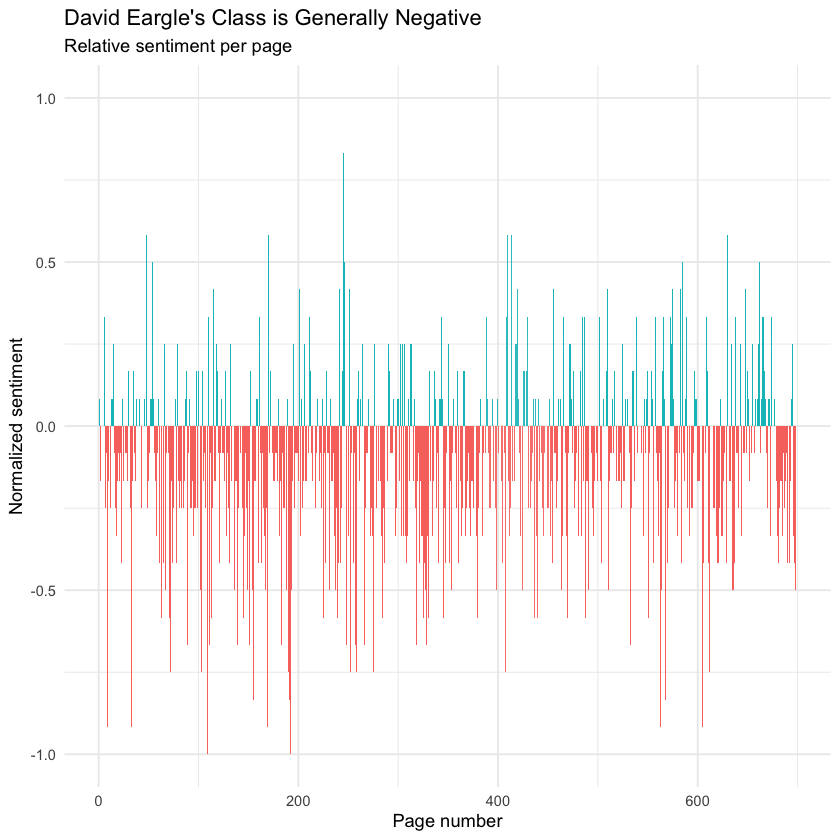

In [54]:
p <- df %>%
  inner_join(get_sentiments("bing")) %>% 
  filter(word != "David") %>% 
  filter(word != "Eargle") %>% 
  filter(word != "Cloud") %>% 
  count(page, sentiment) %>% 
  spread(sentiment, n, fill = 0) %>%
  mutate(sentiment = positive - negative,
         sentiment = sentiment/max(abs(sentiment)),
         dir       = ifelse(sentiment >=0, "up","dn")) 

p %>% 
  ggplot(aes(page, sentiment, fill = dir)) +
  geom_col() +
  labs(title    = "David Eargle's Class is Generally Negative",
       subtitle = "Relative sentiment per page",
       x = "Page number", 
       y = "Normalized sentiment") +
  coord_cartesian(ylim = c(-1,1)) +
  theme_minimal() +
  theme(legend.position='none') 

Generally speaking, Dave's class is overall more negative. This likely speaks into the entire conversation about cybersecurity, it's kind of an abysmal subject at times. One of the most dense set of negative days (from about p 310-325) were when we discussed international cyber attacks such as the one on the Olympics. 

### The most positive day page (245) was actually an error on my part: I included a lecture transcript from the undergrad class, where Dave seems to try to be a little more encouraging than normal, using phrases such as "Isn't it exciting to learn?" and "That was good insight!"

Sorry fellow grads. Life is hard.

In [49]:
top <- p %>% top_n(1,  wt = sentiment) %>% pull(page)
bot <- p %>% top_n(-1, wt = sentiment) %>% pull(page)

d[top]

[1] "Mackenzie Burke: Well, he also helped her learn something. David Eargle: Yeah. David Eargle: Would you be that makes me think of this class. Isnt it exciting to learn these kinds of things. David Eargle: Kind of is David Eargle: Yeah, like to learn that David Eargle: Someones going to teach me. Well thats nice, then you kind of get a return favorite thing going on. David Eargle: You help its hes doing something nice for her so that she can accomplish his objective like hes actually, the question is, is he a nice guy, or just a total is everyone around you doing something for personal benefit maybe David Eargle: Everyone whos nice to you. David Eargle: Why, why are they nice to me. What are they want David Eargle: Im sure its really nice people. But here he is again. David Eargle: Thanks, because that was good insight. David Eargle: Here hes on stage at a DEF CON Derby con kind of thing I really like showing this either the audio is horrible. I like showing this because theres a guy wearing a chicken suit. David Eargle: And because of the energy of the crowd, youre going to see a monitor up on the top left with MSF console running if set up a handler. David Eargle: Which is waiting for incoming connections. Hes trying to get an employee inside of an organization which they have permission to try to hack and they prove that live David Eargle: That they have permission, trying to get him to visit a website and run a file and then youll see up at the top corner interpreter session 17 open 18 1920 life. Okay, so Im going to skip around again chicken suit. Is a mistake. David Eargle: Hes talking. He just got David Eargle: I think "

### The most negative day was when we talked about lockpicking at home depot. Words like "break", "brute/brutal", and "illegal" were used the most during this day. Despite it being the most negative day, I do recall that being one of the classes' most favorite lectures. Maybe we're all a little messed up in the head.

In [51]:
d[bot]

[1] "David Eargle: Recall that we have the core, the implementation tiers and profiles under the NIST cybersecurity framework. Again, this is vocabulary practice. David Eargle: What is the tier David Eargle: Two tier one, tier two, tier four. Just give me a table or something. Scrolling down okay ears much bullets. The tier definitions are as follows. David Eargle: Tier one David Eargle: From what Ive seen a low score in these tears means the company sucks at it and afford means a company thinks theyre doing really good at it. David Eargle: So lets look at the sucks risk measure processes. This is what it looks like if you suck organizational cyber security risk manager practices are not formalized David Eargle: Risk is managed in an ad hoc and sometimes reactive manner. This is bad prioritization of cyber security activities may not be directly informed by organizational risk objectives, the threat environment or business mission requirements. David Eargle: Thats for risk management. What about being bad at integrated risk management, there is limited awareness of cyber security risk at the organizational level. David Eargle: The organization implement cyber security risk management on an irregular case by case basis, Equifax due to varied experience or information gained from outside sources. David Eargle: No sharing of cybersecurity within the organization external participation. David Eargle: It doesnt understand its role in the larger ecosystem with respect to either its dependencies or dependence that supply chain. David Eargle: It does not collaborate with or receive information such as threat intelligence, best practices technologies from other entities by our suppliers dependencies dependence. I dont know what this is. And we know this is David Eargle: Theres a glossary at the bottom. David Eargle: Information Sharing an analytics organization. What does that "                   
[2] "one is this making sense. Hopefully its making sense. Oh look, an advertisement thats exactly the way I purchase things when they pop up in my face. David Eargle: Oh, heres an oversight example. David Eargle: See that driver said above the line. Good example you can buy locks like this that are cut away. So you can see exactly what youre doing. David Eargle: Handing David Eargle: The tools for lock picking if youre going to attempt this so you can get started really cheap. I can point you to Salford lock picks like $10 set David Eargle: And just pick up one from the fire and just not install it. Just hold in your hand and play with it. You want taking off the face and just holding the inner sounder the two golden rules of lock picking. Are you may not. Pick a Lock you dont own if you do, its illegal. David Eargle: Dont be the jerk who goes down the Home Depot. Ill picking the locks in the aisle. Thats not your problem. You can break a lock that youre picking David Eargle: How does that happen. David Eargle: Its like breaking the pins on the inside. It just wont open anymore. This is one of the most gentle methods of lock picking though. David Eargle: Theres certainly much more brutal ways like bump keys which I also have up in my office which youre hitting with a hammer that you can definitely break stuff on the inside. David Eargle: So dont take stuff you dont own dont pick a lock you rely on. For that reason, unless you like David Eargle: Unless you are ready for. Its not working. David Eargle: Is illegal to possess lock picking tools actually yes pics are the it may look suspicious to a police officer, a question of, Is it legal is different than does it look suspicious will get you arrested. David Eargle: You might get arrested for a bad reason its not illegal pics are legal by statute state must prove criminal intent, but in tennis, Tennessee. What happens thats Kentucky. This "

Here are the most used negative/positive contributors in the analysis. 

Joining, by = "word"

Selecting by n



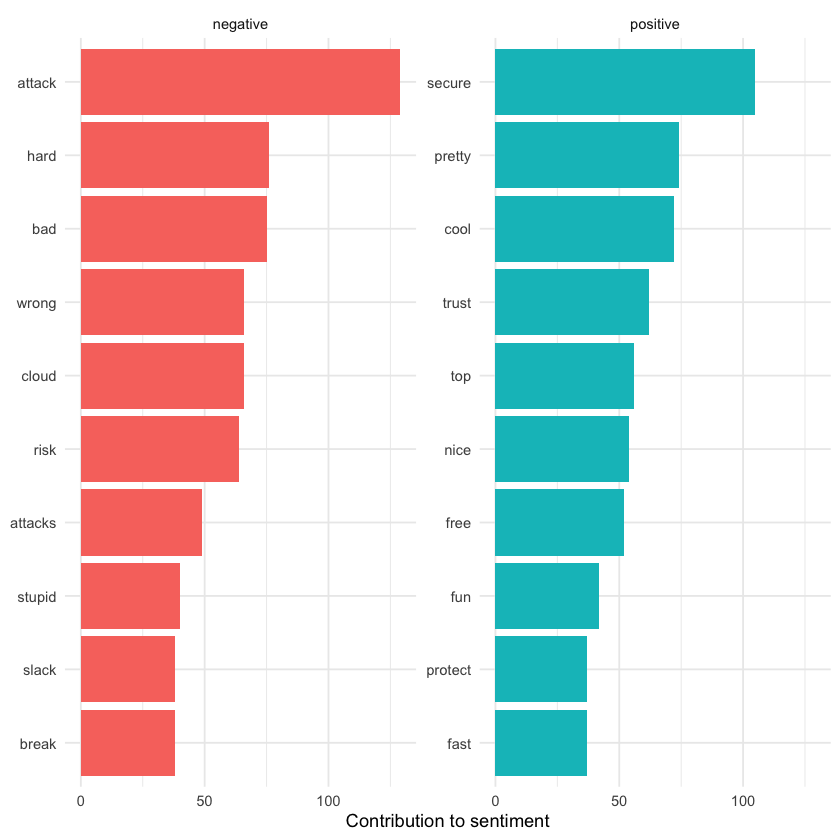

In [55]:
bing_word_counts <- df %>%
  inner_join(get_sentiments("bing")) %>%
  filter(word != "trump") %>% 
  count(word, sentiment, sort = TRUE) %>%
  ungroup()

bing_word_counts %>%
  group_by(sentiment) %>%
  top_n(10) %>%
  ungroup() %>%
  mutate(word = reorder(word, n)) %>%
  ggplot(aes(word, n, fill = sentiment)) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~sentiment, scales = "free_y") +
  labs(y = "Contribution to sentiment",
       x = NULL) +
  coord_flip() +
  theme_minimal()

And here's a wordcloud because it's pretty :)

Joining, by = "word"



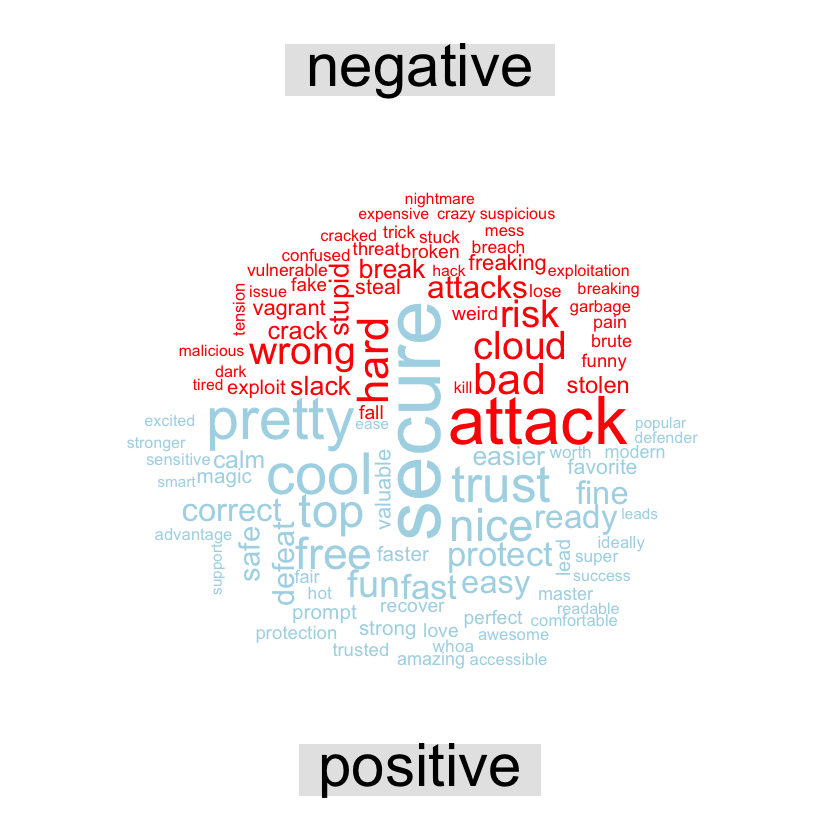

In [56]:
df %>%
  inner_join(get_sentiments("bing")) %>%
  filter(word != "trump") %>% 
  count(word, sentiment, sort = TRUE) %>%
  acast(word ~ sentiment, value.var = "n", fill = 0) %>%
  comparison.cloud(colors = c("red", "lightblue"),
                   max.words = 100)